# I - Introduction

# II - Prepare required frameworks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
import lightgbm as lgbm
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

In [2]:
import warnings

# Ẩn tất cả các cảnh báo
warnings.filterwarnings('ignore')

In [3]:
# from sklearnex import patch_sklearn

In [4]:
# patch_sklearn()

# III - Prepare dataset

# 1. Load dataset

In [5]:
dataset = pd.read_excel('./Dry_Bean_Dataset.xlsx')

In [6]:
# dataset.info()

In [7]:
# dataset.duplicated().sum()

In [8]:
dataset = dataset.set_index('Bean ID')

In [9]:
dataset.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [10]:
features = dataset.columns[:-1]
target = dataset.columns[-1]

In [11]:
# x.describe()

In [23]:
x = dataset[features]
y = dataset[target]

In [12]:
scaler = StandardScaler()
encoder = LabelEncoder()

In [37]:
# dataset['Class'] = pd.DataFrame(encoder.fit_transform(dataset['Class']), columns=['Class'])

In [14]:
# dataset['Class'].value_counts()

In [15]:
def prepare_data(dataset, features, target, scaler, encoder):
    x = dataset[features]
    y = dataset[target]
    x_scaled = scaler.fit_transform(x)
    y_encoded = encoder.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=20)
    return x_train, x_test, y_train, y_test

In [16]:
x_train, x_test, y_train, y_test = prepare_data(dataset, features, target, scaler, encoder)

# Training models

In [17]:
models = {
    "KNeighbors": KNC(),
    "LogisticRegression": LR(),
    "RandomForest": RFC(),
    "SVC": SVC(),
    # "GradientBoosting": GBC(),
    # "LightGBM": lgbm.LGBMClassifier()
}

def get_scores(models, xtrain, ytrain, xtest, ytest):
    for name, model in models.items():
        print(f"-----> {name}")
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        reports = classification_report(ytest, ypred)
        print("---> Classification_reports: \n", reports)
        
        scores = np.mean(cross_val_score(model, xtrain, ytrain, cv=5))
        print("---> Cross-validation scores: \n", scores)
        print("============================================\n")

In [18]:
get_scores(models, x_train, y_train, x_test, y_test)

-----> KNeighbors
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       279
           1       1.00      1.00      1.00       103
           2       0.93      0.95      0.94       332
           3       0.91      0.93      0.92       714
           4       0.94      0.95      0.95       341
           5       0.96      0.93      0.94       427
           6       0.86      0.88      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

---> Cross-validation scores: 
 0.9194539878258089

-----> LogisticRegression
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       279
           1       1.00      1.00      1.00       103
           2       0.94      0.95      0.95       332
           3       0.92     

# EDA

# Các thuộc tính
Area (A)	Diện tích:	Diện tích vùng của hạt đậu và số pixel nằm trong ranh giới của nó.

Perimeter (P)	Chu vi:	Chu vi của hạt đậu được định nghĩa là độ dài của đường viền.

Major axis length (L)	Độ dài trục chính:	Khoảng cách giữa hai đầu của đường thẳng dài nhất có thể vẽ trên hạt đậu.

Minor axis length (l)	Độ dài trục phụ:	Đường thẳng dài nhất có thể vẽ trên hạt đậu theo hướng vuông góc với trục chính.

Aspect ratio (K)	Tỷ lệ dài rộng:	Xác định mối quan hệ giữa L và l.

Eccentricity (Ec)	Độ lệch tâm:	Độ lệch tâm của hình elip có cùng các mô men như vùng hạt đậu.

Convex area (C)	Diện tích lồi:	Số pixel trong đa giác lồi nhỏ nhất có thể chứa diện tích của hạt đậu.

Equivalent diameter (Ed)	Đường kính tương đương:	Đường kính của một hình tròn có cùng diện tích với diện tích của hạt đậu.

Extent (Ex)	Độ bao phủ:	Tỷ lệ giữa số pixel trong khung bao và diện tích của hạt đậu.

Solidity (S)	Độ đặc:	Còn được gọi là độ lồi. Tỷ lệ giữa số pixel trong vỏ lồi và số pixel tìm thấy trong hạt đậu.

Roundness (R)	Độ tròn:	Được tính toán bằng công thức: (4piA)/(P^2)

Compactness (CO)	Độ gọn:	Đo độ tròn của một vật thể: Ed/L

ShapeFactor1 (SF1)	Hệ số hình dạng 1:	Tham số hình dạng bổ sung.

ShapeFactor2 (SF2)	Hệ số hình dạng 2:	Tham số hình dạng bổ sung.

ShapeFactor3 (SF3)	Hệ số hình dạng 3:	Tham số hình dạng bổ sung.

ShapeFactor4 (SF4)	Hệ số hình dạng 4:	Tham số hình dạng bổ sung.

Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)	Lớp	Thuộc tính này phân loại hạt đậu thành các loại khác nhau: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz và Sira.


<Axes: xlabel='Types of bean', ylabel='Count'>

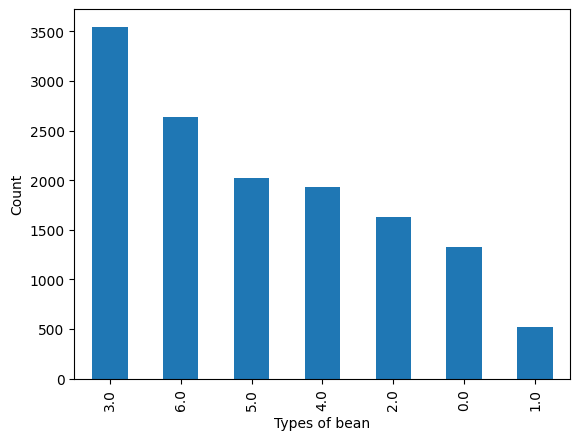

In [19]:
dataset['Class'].value_counts().plot(kind='bar', xlabel='Types of bean', ylabel='Count')

### Drop outliner

In [24]:
data_heads = x.columns
data_heads

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

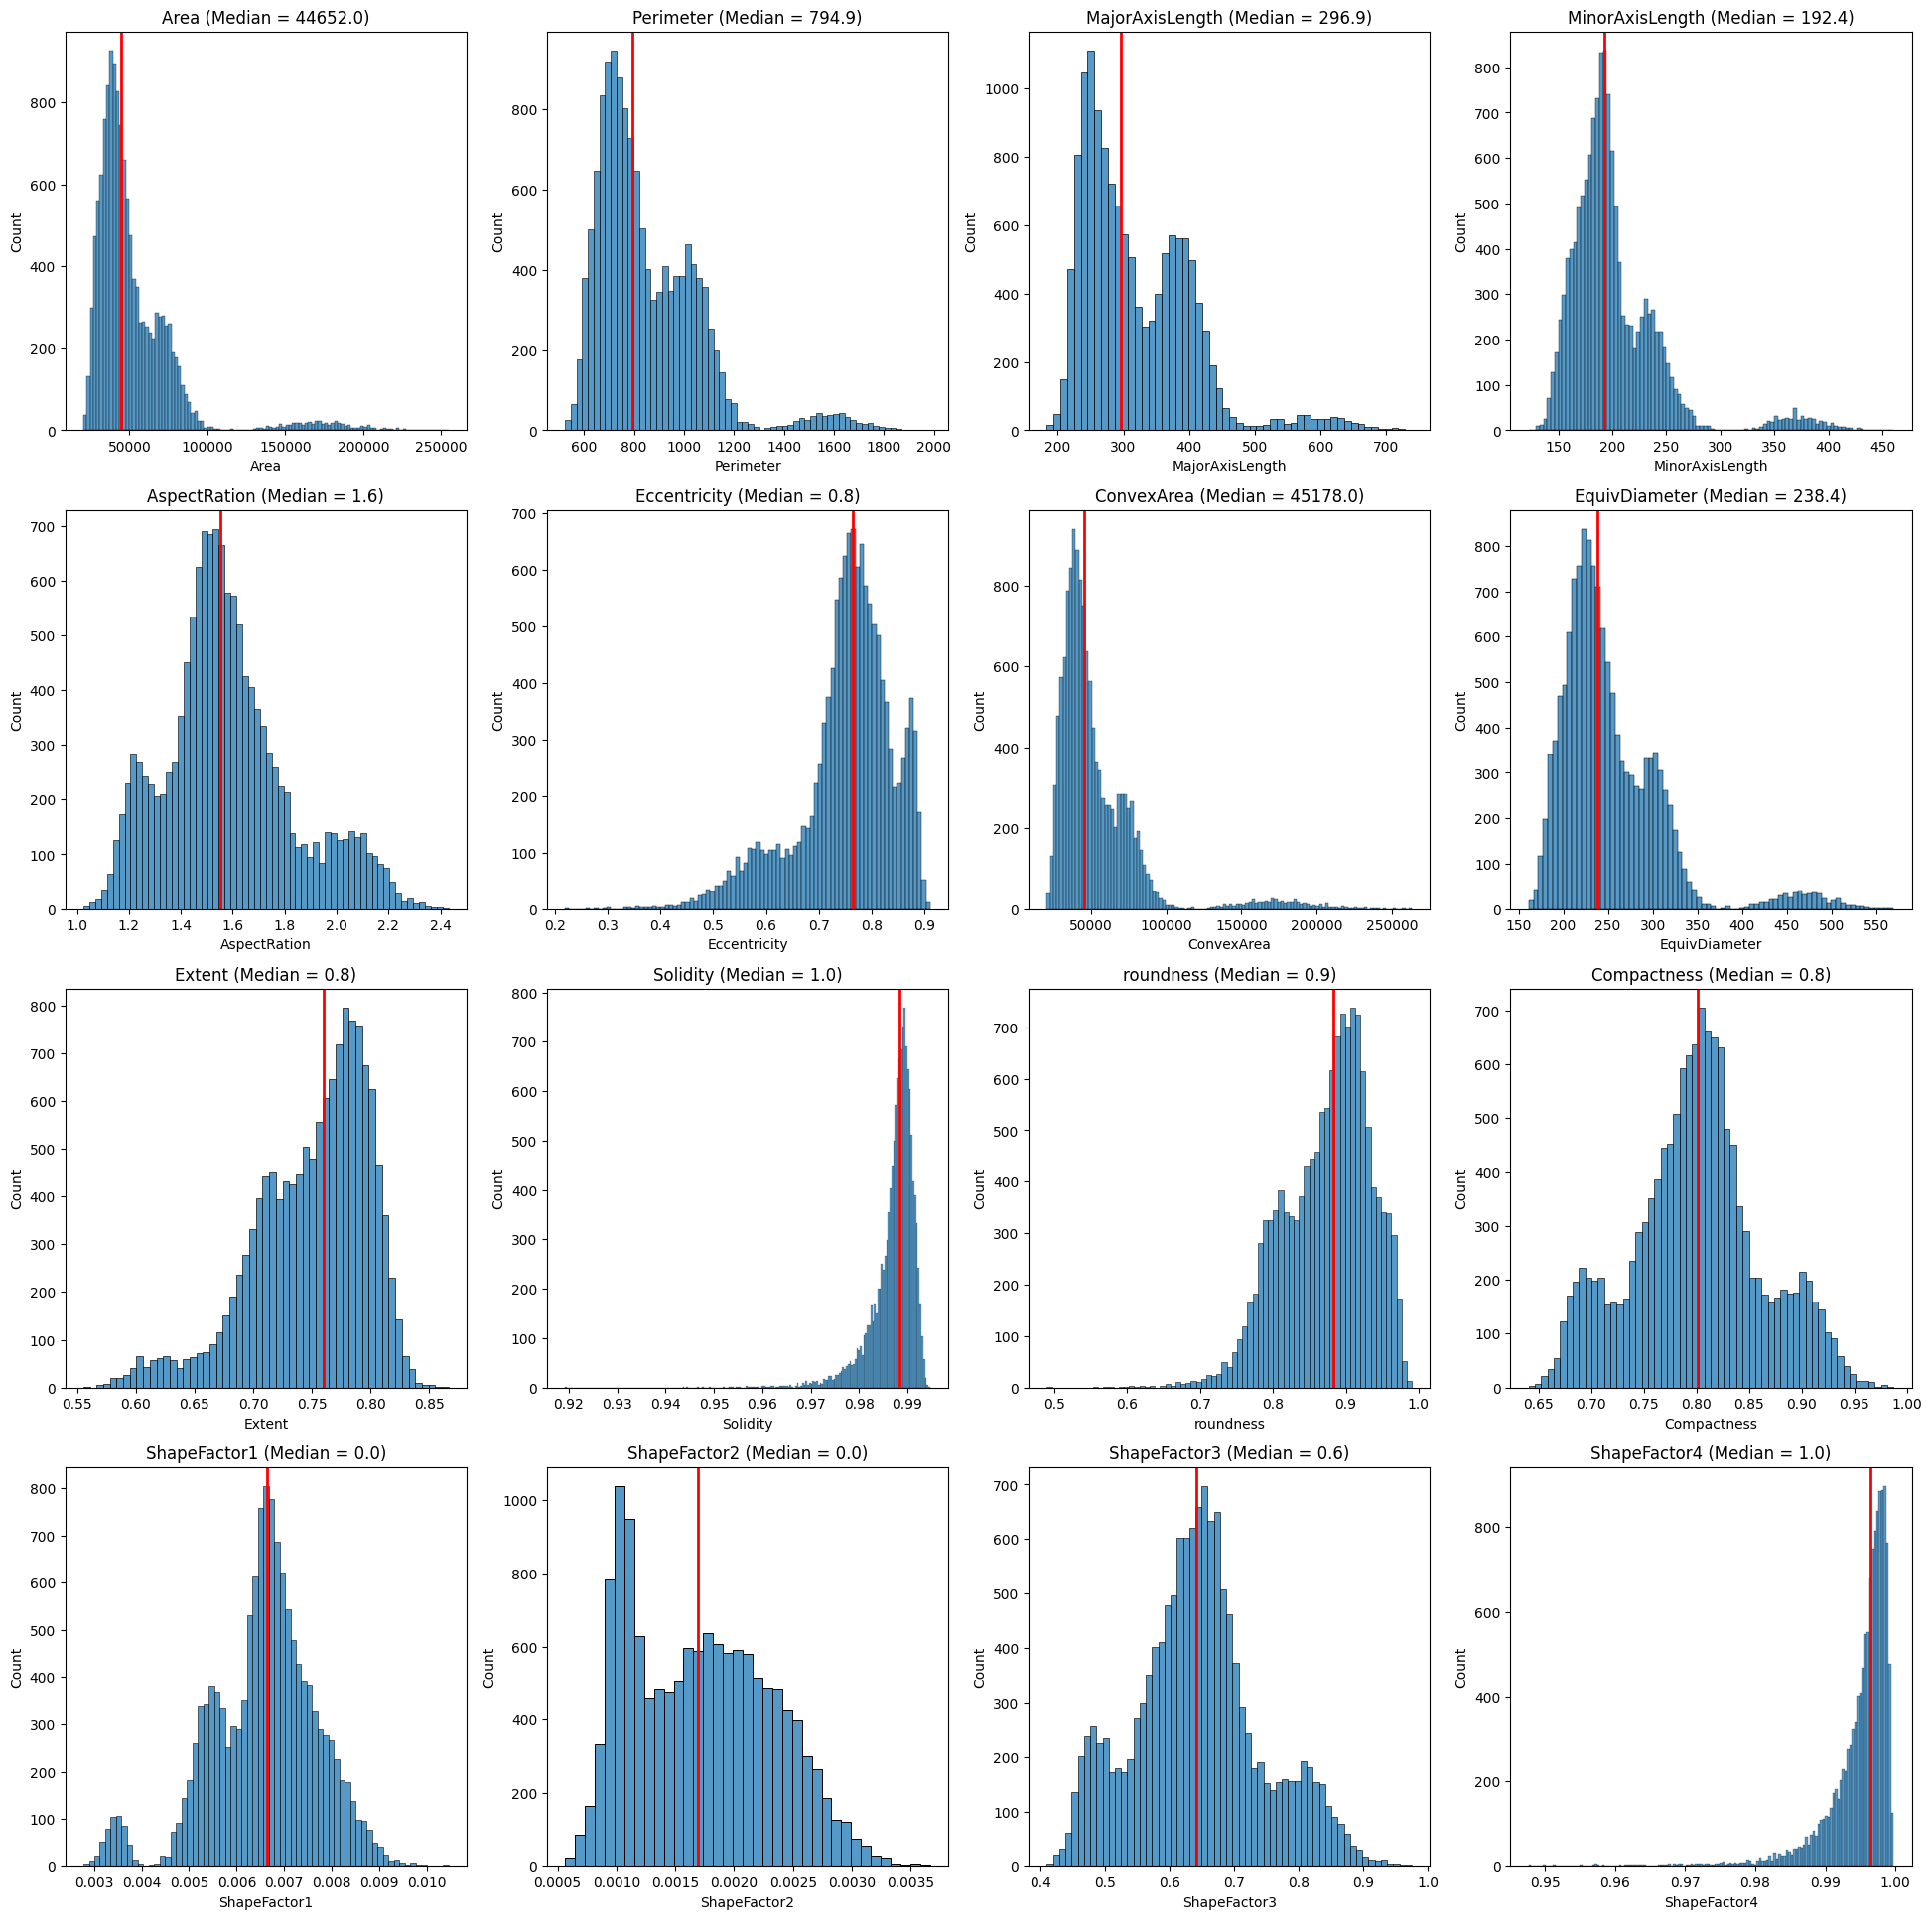

In [25]:
# Biều đồ hist thêm đường trung vị
fig, axes = plt.subplots(4,4, figsize = (24,24))
for i, axe in enumerate(axes.flatten()):
    sns.histplot(data = x[data_heads[i]], ax = axe)
    median = x[data_heads[i]].median()
    axe.set_title(f'{data_heads[i]} (Median = {median:0.1f})')
    axe.axvline(median, color='red', lw=2, alpha=1)

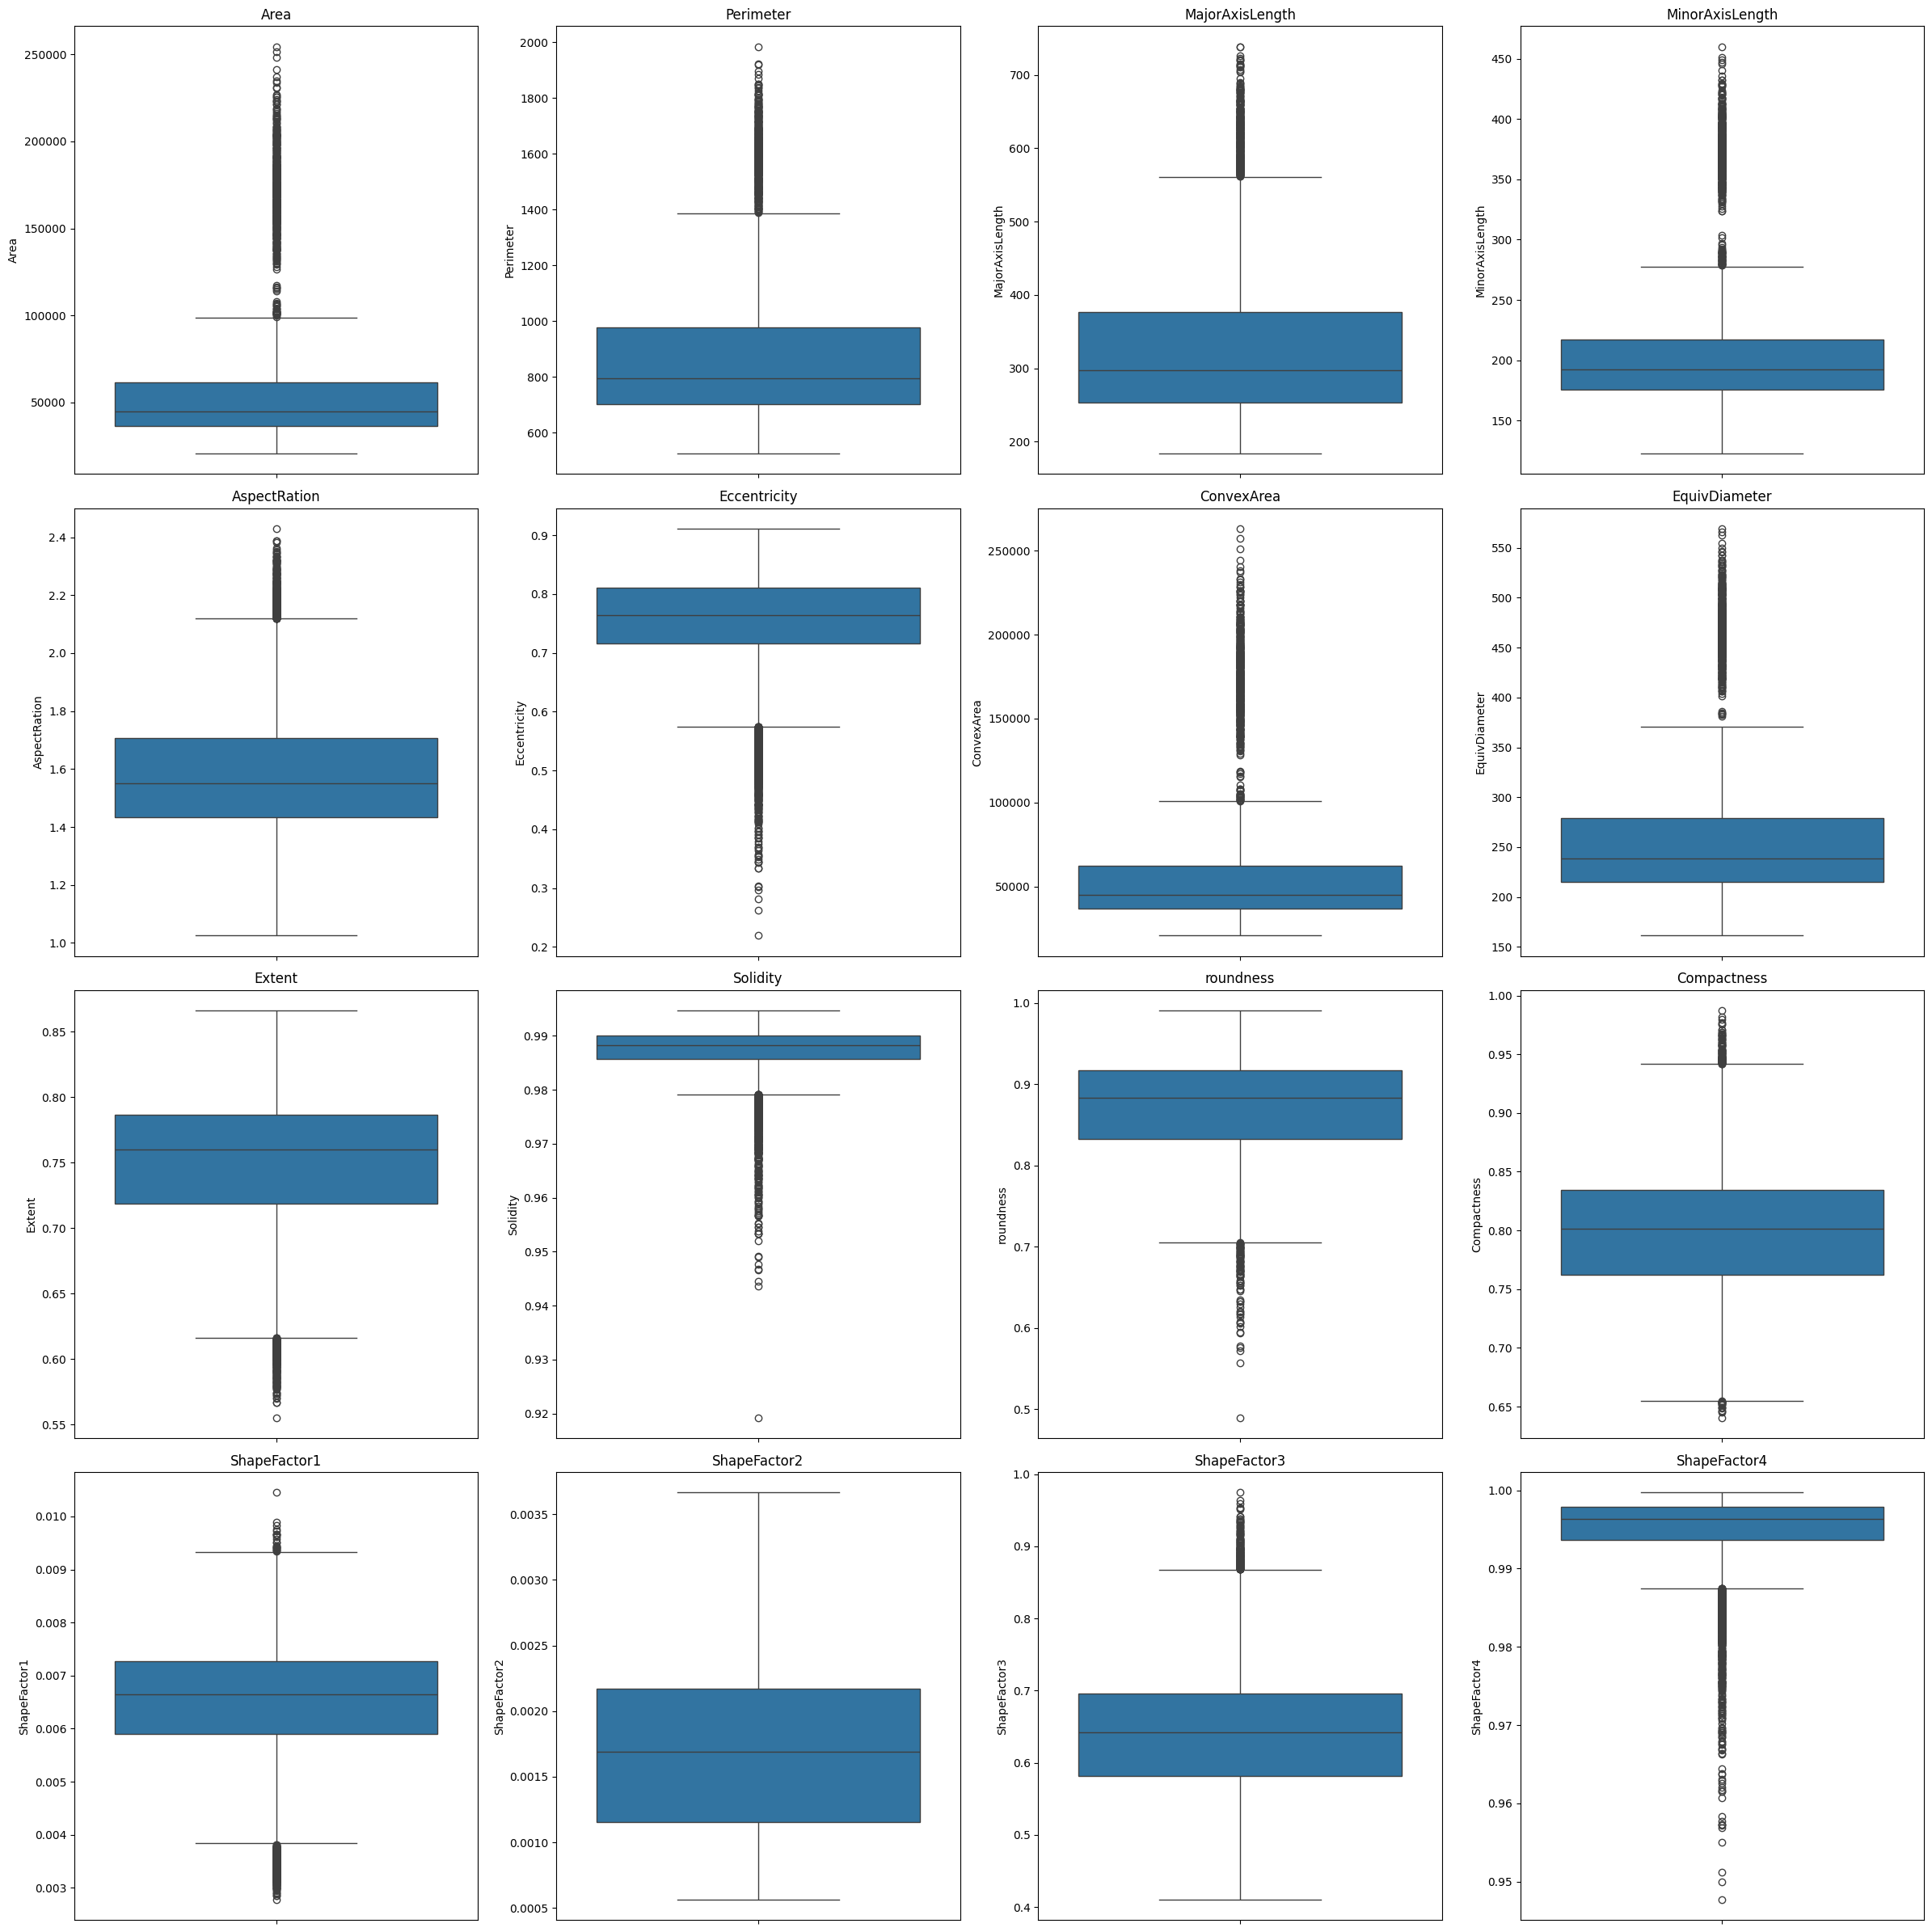

In [26]:
# Biều đồ Boxplot để xem nhiễu
fig, axes = plt.subplots(4, 4, figsize=(24,24))
for i,axe in enumerate(axes.flatten()):
    sns.boxplot(data = x[data_heads[i]], ax = axe)
    axe.set_title(f'{data_heads[i]}')
plt.tight_layout()

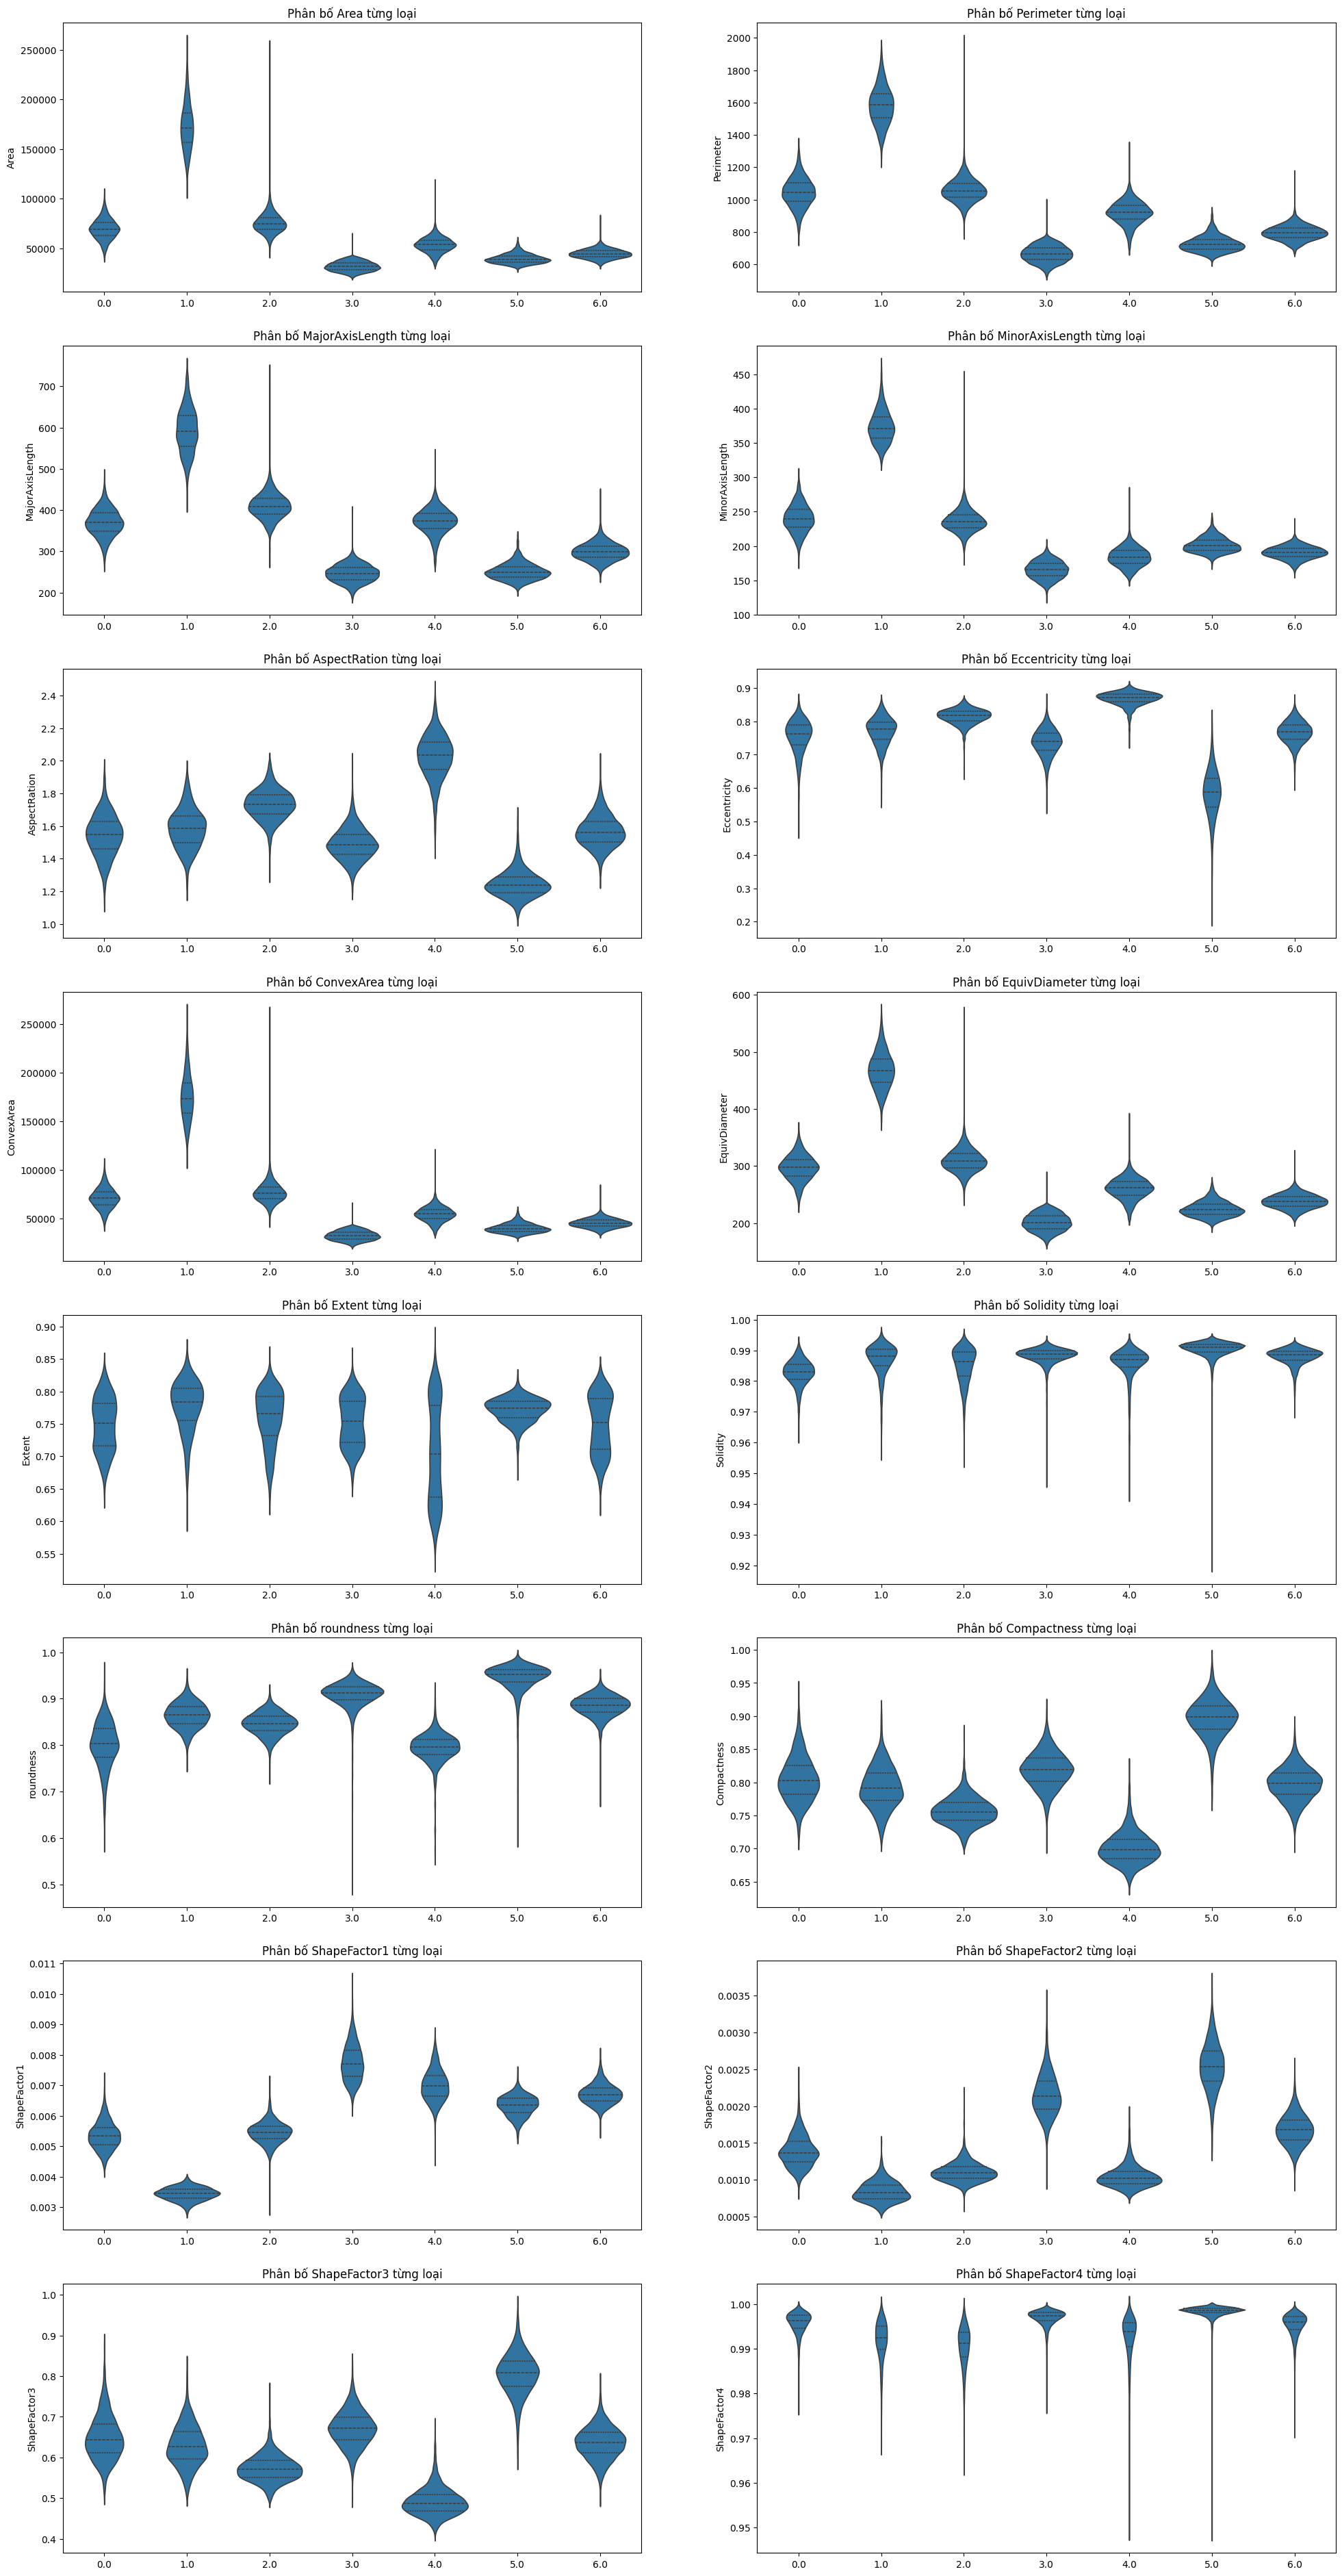

In [27]:
fig, axes = plt.subplots(8, 2, figsize=(24,48))
for feature, ax in zip(x.columns, axes.flatten()):
    sns.violinplot(data = dataset, x = 'Class', y = feature, ax = ax, inner="quartile" )
    ax.set(xlabel = None)
    ax.set_title(f'Phân bố {feature} từng loại')

In [107]:
def drop_outliers(dataset, features):
    # Tính toán Z-score cho mỗi điểm dữ liệu
    z_scores = stats.zscore(dataset[features])

    # Xác định ngưỡng cho Z-score
    threshold = 3

    # Loại bỏ các outlier
    dataset_cleaned = dataset.loc[(z_scores < threshold).all(axis=1)]

    # In ra số lượng outlier đã loại bỏ
    outliers_removed = dataset.shape[0] - dataset_cleaned.shape[0]
    print("Số lượng outlier đã loại bỏ:", outliers_removed)
    return dataset_cleaned

In [108]:
dataset_cleaned = drop_outliers(dataset, features)
x_train, x_test, y_train, y_test = prepare_data(dataset_cleaned, features, target, scaler, encoder)
get_scores(models, x_train, y_train, x_test, y_test)

Số lượng outlier đã loại bỏ: 537
-----> KNeighbors
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       274
           1       1.00      0.75      0.86         4
           2       0.92      0.94      0.93       343
           3       0.91      0.90      0.91       697
           4       0.94      0.94      0.94       360
           5       0.95      0.94      0.94       408
           6       0.84      0.88      0.86       529

    accuracy                           0.91      2615
   macro avg       0.93      0.89      0.91      2615
weighted avg       0.91      0.91      0.91      2615

---> Cross-validation scores: 
 0.9208345335056094

-----> LogisticRegression
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       274
           1       1.00      0.75      0.86         4
           2       0.94      0.94      0.94      

### Drop large corr

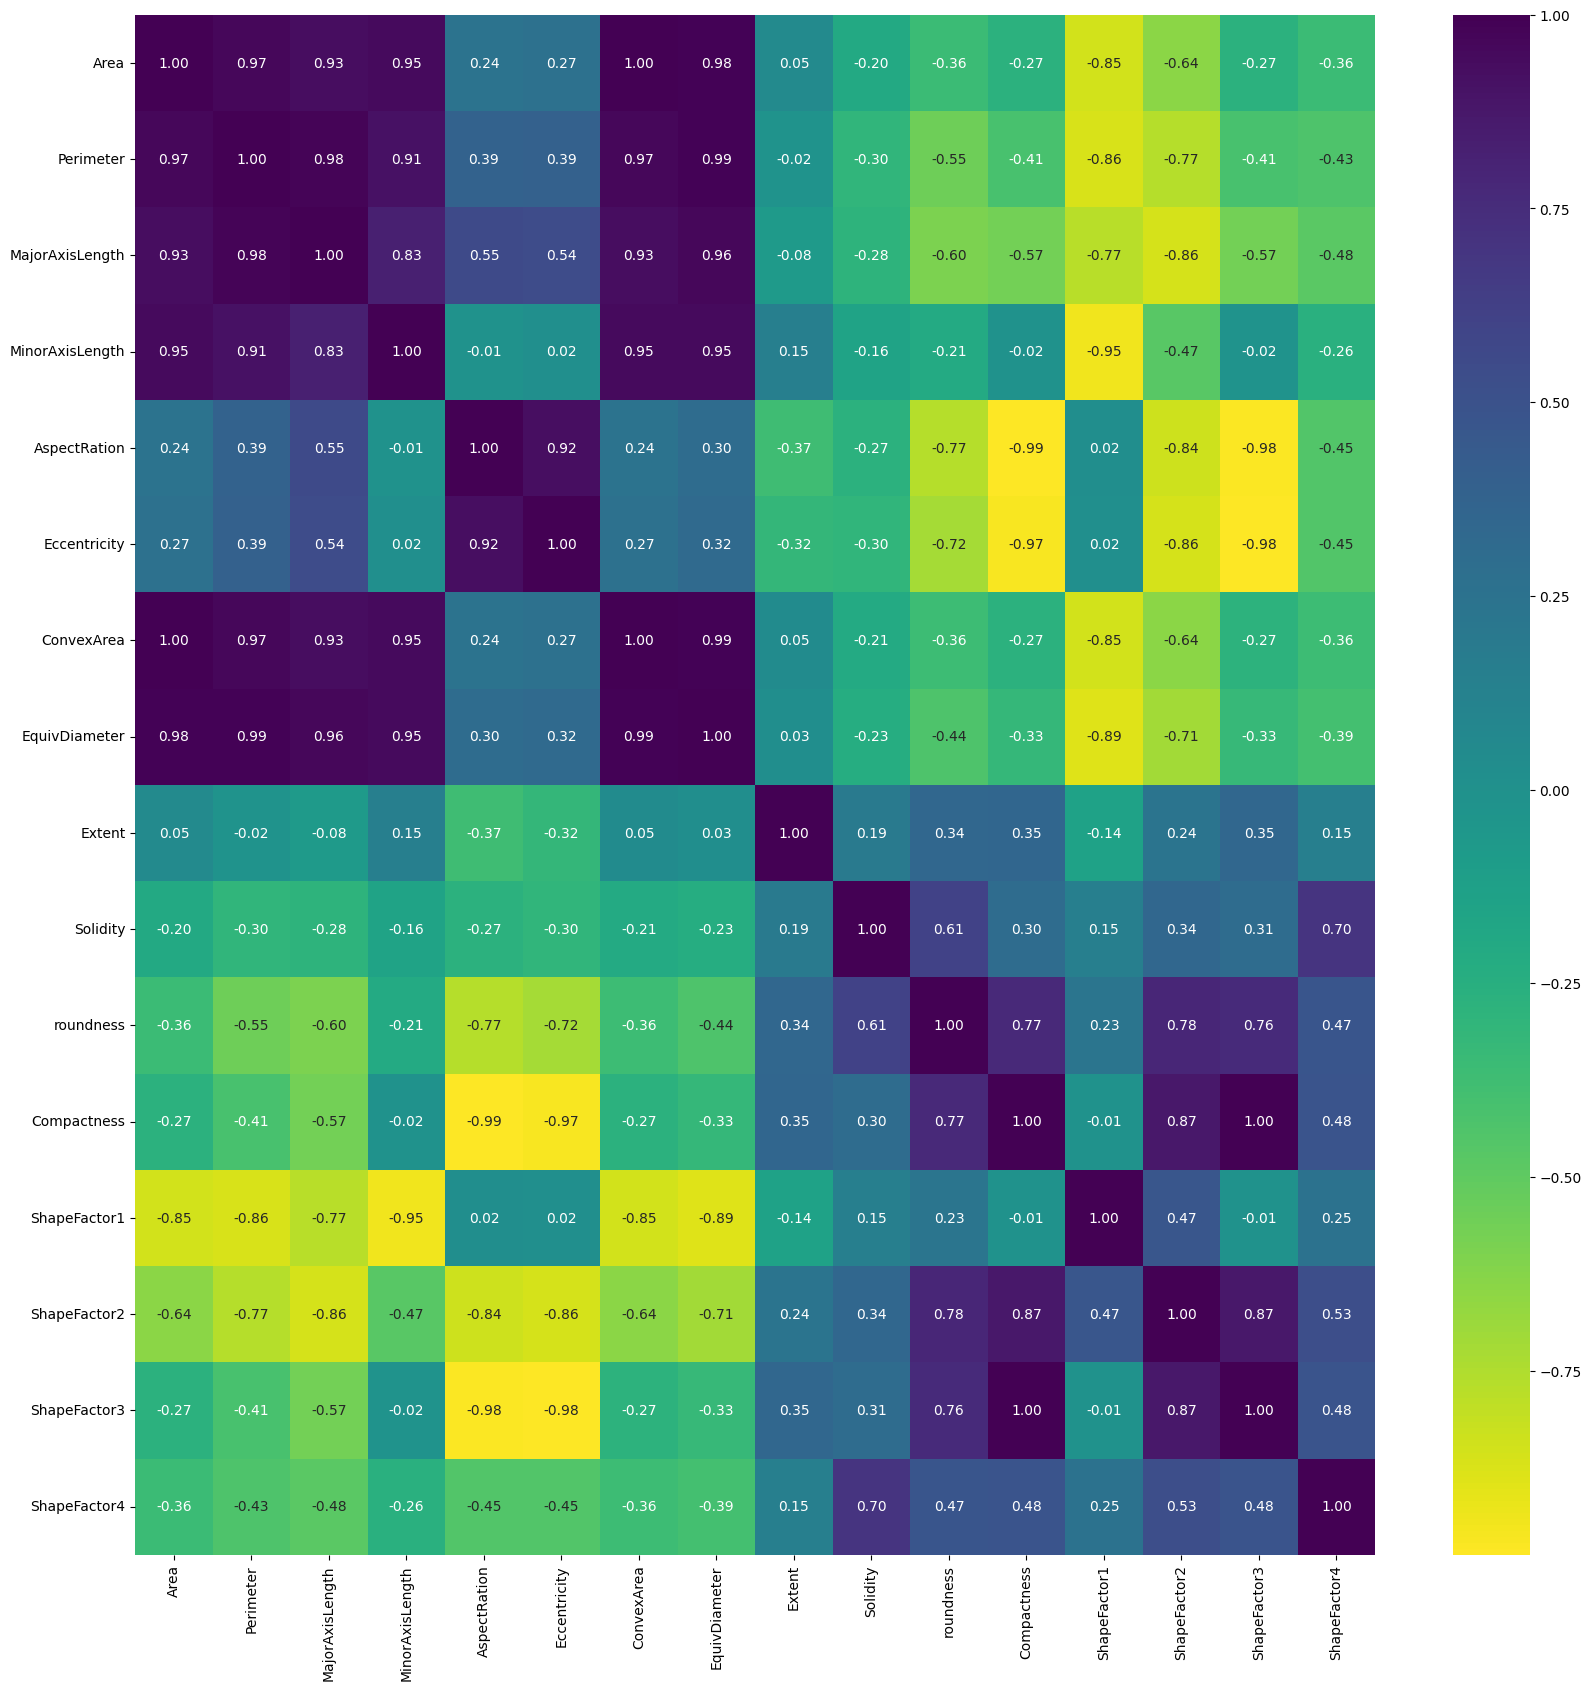

In [40]:
# correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

In [105]:
def drop_corr(dataset, features):
    # Đọc dữ liệu từ file CSV hoặc tạo ma trận tương quan từ dữ liệu hiện có
    corr_matrix = dataset[features].corr().abs()

    # Chọn ngưỡng tương quan
    threshold = 0.8

    # Tạo một bản sao của ma trận tương quan
    mask = corr_matrix.copy()

    # Thiết lập giá trị True cho các ô phía trên đường chéo chính
    # mask[np.triu_indices_from(mask.values)] = 0

    for i in range(len(mask.columns)):
        for j in range(i + 1):
            mask.iloc[i,j] = 0

    # print(mask)
    # Loại bỏ các biến dựa trên ngưỡng tương quan
    drop_cols = [column for column in mask.columns if any(mask[column] > threshold)]

    # Loại bỏ các cột từ DataFrame
    dataset_filtered = dataset.drop(drop_cols, axis=1)
    return dataset_filtered

In [106]:
dataset_filtered = drop_corr(dataset_cleaned, features)

In [102]:
x_train, x_test, y_train, y_test = prepare_data(dataset_filtered, dataset_filtered.columns[:-1], dataset_filtered.columns[-1], scaler, encoder)

In [103]:
get_scores(models, x_train, y_train, x_test, y_test)

-----> KNeighbors
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       278
           1       0.99      0.99      0.99       103
           2       0.93      0.93      0.93       333
           3       0.91      0.89      0.90       714
           4       0.94      0.95      0.95       341
           5       0.96      0.93      0.94       427
           6       0.81      0.88      0.84       527

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.91      0.91      0.91      2723

---> Cross-validation scores: 
 0.905400942232278

-----> LogisticRegression
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       278
           1       0.99      0.99      0.99       103
           2       0.95      0.94      0.94       333
           3       0.91      

In [ ]:
Strongly_corr_features = dataset[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="Class")

In [ ]:
dataset.columns

In [ ]:
mi_scores = mutual_info_classif(x, y, random_state = 31)
mi_scores_df = pd.DataFrame({'Feature': x.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(20,10))
sns.barplot(x='MI Score', y='Feature', data=mi_scores_df) 
plt.xlabel('Mutual Information Score')
# plt.ylabel('Feature')
plt.title('Mutual Information Scores for Each Feature')
# plt.gca().invert_yaxis() # sắp xếp lại theo giảm dần
plt.show()

### Drop large corr and outliner

In [109]:
data = drop_corr(dataset_cleaned, features)
x_train, x_test, y_train, y_test = prepare_data(data, data.columns[:-1], data.columns[-1], scaler, encoder)
get_scores(models, x_train, y_train, x_test, y_test)

-----> KNeighbors
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       274
           1       1.00      0.75      0.86         4
           2       0.91      0.95      0.93       343
           3       0.91      0.90      0.91       697
           4       0.95      0.94      0.95       360
           5       0.95      0.93      0.94       408
           6       0.83      0.88      0.85       529

    accuracy                           0.91      2615
   macro avg       0.93      0.89      0.91      2615
weighted avg       0.91      0.91      0.91      2615

---> Cross-validation scores: 
 0.9148104916545735

-----> LogisticRegression
---> Classification_reports: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       274
           1       1.00      0.75      0.86         4
           2       0.95      0.93      0.94       343
           3       0.92     